<a href="https://colab.research.google.com/github/JaebinChoi/Artificial-Intelligence/blob/master/advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Advanced

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 114kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=eb26582d63b4f5d68566d9d06806823af4758e4e07357daad5a0acb0f1bdf552
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


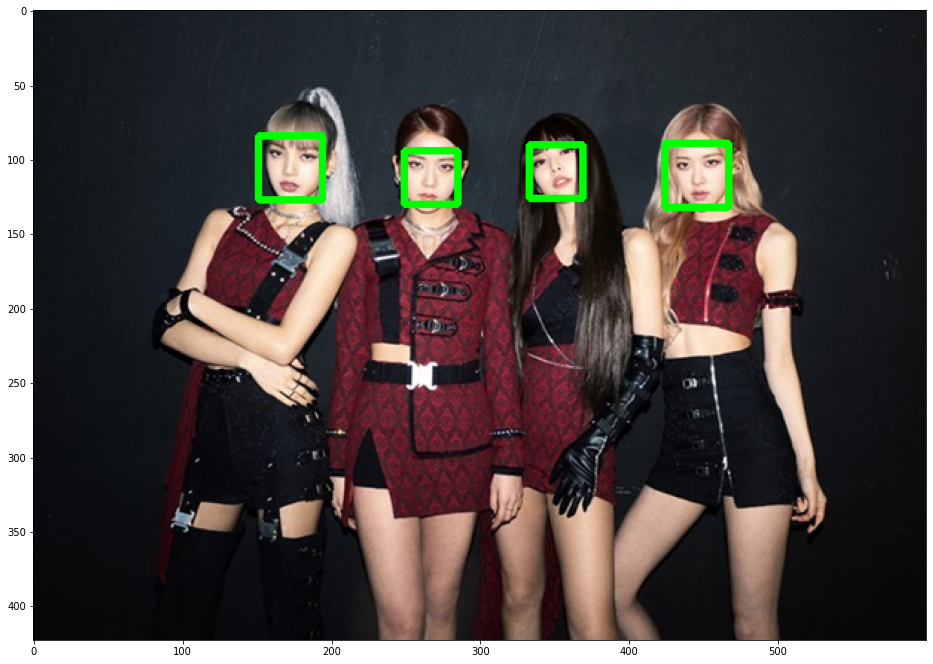

In [ ]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

image_path = "/gdrive/My Drive/TestImg/blackpink.jpg"

image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

for(top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)

# 이미지 버퍼 출력
plt.rcParams["figure.figsize"] = (16, 16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


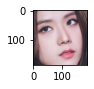

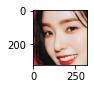

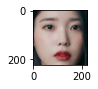

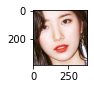

In [ ]:
# 인물사진을 구글 드라이브에 업로드 후 리스트에 추가

# 네모 칸 크기
plt.rcParams["figure.figsize"] = (1,1)

# 이미지 파일을 로드하여 known_person_list 리스트 생성
known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/TestImg/jisu.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/TestImg/irin.jpeg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive//TestImg/iu.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive//TestImg/suji.jpg"))

# 얼굴을 인식하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list:
  
  # 얼굴 좌표를 알아내서 잘라낸다
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  # known_face_list에 잘라낸 face_image를 저장
  known_face_list.append(face_image)

# known_face_list에 저장된 얼굴들 출력
for face in known_face_list:
  plt.imshow(face)
  plt.show()

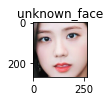

In [ ]:
# 기존리스트에 없는 새로운 파일을 열어서
unknown_person = fr.load_image_file("/gdrive/My Drive/TestImg/jisu2.jpg")

# 얼굴 좌표를 알아낸 후 잘라낸다
top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

# unknown_face 이라는 타이틀을 붙여서 표시
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

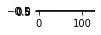

In [ ]:
# face_encoding() 함수를 사용해 enc_unknown_face 에 얼굴영역을 인코딩해 저장

# unknown_person_face를 인코딩
enc_unknown_face = fr.face_encodings(unknown_face)

# 화면에 표시해보면 다음과 같다
plt.imshow(enc_unknown_face)
plt.show()

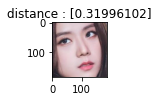

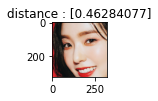

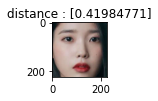

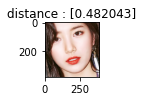

In [ ]:
# face_distance() 함수를 사용해 known_face_list 에 저장된 기존 4명의 얼굴과 새로 입력된 unknown_face의 distance 를 구합니다.
# 일반적으로 0.6 이상이면 타인, 0.6 미만이면 동일인, 엄격한 기준으로 0.5 미만이면 동일인

# 등록된 얼굴리스트를 비교
for face in known_face_list:

  # 등록된 얼굴을 128-dimensional face 인코딩
  enc_known_face = fr.face_encodings(face)

  # 등록된 얼굴과 새로운 얼굴의 distance를 얻기
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  # distance 수치를 포함한 얼굴 출력
  plt.title("distance : " + str(distance))
  plt.imshow(face)
  plt.show()